<center><h1> THEME 3 - Visualisation </h1></center>

### 🎯 Objectifs

- Visualisation de fonctions analytiques
- Utilisation de graphiques appropriés pour visualiser un jeu de données
- Utilisation de techniques d'analyse graphique
- Génération d'animations

### 📚 Notions 

- [Exemple 1](#ex1): Anatomie d'un graphique Matplotlib, tracer des courbes analytiques
- [Exemple 2](#ex2): Création de graphiques à barres et de diagrammes circulaires
- [Exemple 3](#ex3): Visualisation de plusieurs graphiques en même temps
- [Exemple 4](#ex4): Visualisation 2D
- [Exemple 5](#ex5): Visualisation 3D
- [Exemple 6](#ex5): Animation

Un [lexique](#lexique) avec l'ensemble des fonctions qui ont été vues est disponible à la fin du notebook.

### 🧰 Librairies

- **Matplotlib** est une librairie complète qui permet de créer très facilement des visualisations principalement statiques et interactives en Python.
- **PyQtGraph** est une librairie de haute performance, axée sur la visualisation d'une grande quantité de données, animations et création de GUI.

### 🔗 Références

- [Documentation Matplotlib](https://matplotlib.org/3.5.0/index.html)
- [Scientific visualization with Python & Matplotlib](https://github.com/rougier/scientific-visualization-book/blob/master/pdf/book.pdf)
- [Documentation PyQtGraph](https://pyqtgraph.readthedocs.io/en/latest/)

---

<center><h2 id='ex1'> Exemple 1 - Équation de Van Der Waals </h2></center>

### 📝 Contexte
En thermodynamique, l'équation de Wan Der Waals permet de décrire l'état d'un fluide: 

$$
\begin{aligned}
P=\frac{RT}{{\bar{V}}-b}-\frac{a}{{\bar{V}}^2}
\end{aligned}
$$

Avec
$$
\begin{aligned}
a &=\frac{27}{64}\frac{{{T_{c}}^2}{R^2}}{P_{c}}\\
b &=\frac{{R}{T_{c}}}{{8}{P_{c}}}\\
\end{aligned}
$$

En prenant pour exemple l'hexane: 
- $R=8.314 \mathrm{{J} {mol^{−1}} {K^{−1}}}$ (constante des gazs parfaits)
- $T_{c}=507.5 \mathrm{K}$ (Température critique)
- $Pc = 30.1 \times {10^5} \mathrm{Pa}$ (Pression critique)

### ⭐ Objectif

Afficher sur un même graphique la pression $P$ pour un volume molaire $\bar{V}$ entre $10^{-4}$ et $1 m^{3}mol^{-1}$ pour des températures égales à 0.5, 0.75, 1, 1.5 et 2 fois la température critique $T_{c}$.

### 💻 Code

On commence par définir les constantes et la fonction du problème

In [42]:
import numpy as np
import matplotlib.pyplot as plt

class constantes():
    R = 8.314 # J/(K*mol)
    T_c = 507.5 # K
    P_c = 30.1 * 1e5 # Pa
    a = 27/64 * (T_c**2 * R**2) / P_c
    b = (R * T_c) / (8 * P_c)

const = constantes()

T = np.array([0.5,0.75,1,1.5,2]) * const.T_c

def fn_van_der_waals(const, T, vec_V):
    """
    @brief: Équation de Van der Waals sous forme intensive
    @param:
        - const: constantes du problème
        - T: température en K
        - vec_V: vecteur des valeurs de V
    @return:
        - vec_P: vecteur des valeurs de P
    """
    vec_P = const.R*T/(vec_V-const.b) - const.a/(vec_V**2)
    return vec_P

Pour ensuite visualiser des données, il est d'abord essentiel de comprendre la terminologie des différents éléments qui composent un graphique matplotlib.

<center>
    <img src='assets/anatomy_of_figure.png' width=500px>
</center>

Pour commencer, une première courbe est tracée en prenant les valeurs évaluées pour $T = 0.25*T_{c}$ (1er élément du vecteur T).

Tracer une courbe se fait en utilisant: 
`plt.plot(<données x>,<données y>,'<couleur><marqueur><type de ligne>', linewidth=, markersize=, label=)`.

- `<couleur>` est la [couleur](https://matplotlib.org/2.0.1/api/colors_api.html) de la ligne (et des points).
- `<marqueur>` est le type de [point](https://matplotlib.org/stable/api/markers_api.html) utilisé.
- `<type de ligne>` est le [style de ligne](https://matplotlib.org/2.0.1/api/lines_api.html#matplotlib.lines.Line2D.set_linestyle) utilisé (pleine, tiretée, pointillés, etc...)

Ces arguments sont bien sûr facultatifs. Matplotlib offre une multitude d'options pour personnaliser son grpaphique, il est recommandé de consulter la documentation officielle pour voir toutes les options. 

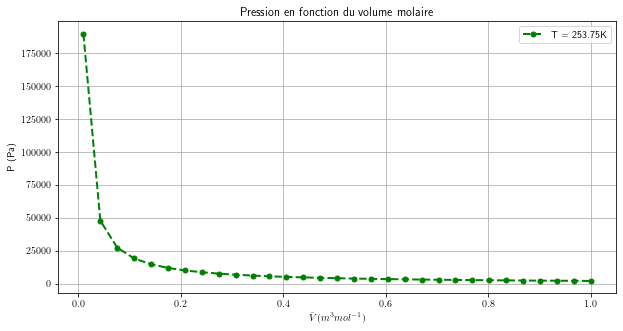

In [46]:
vec_V = np.linspace(0.01,1,31) # Discrétisation du volume molaire entre 0.01 et 1
P = fn_van_der_waals(const, T[0], vec_V) # Calcul de la pression avec notre fonction

f = plt.figure(figsize=(10,5)) # Permet d'ajuster la taille du graphique affiché sur le notebook

# Tracé de la pression en fonction du volume molaire
# ---------------------------------------------------
# 'go--' veut dire green - circle marker - dashed line
# On peut aussi rentrer ces arguments avec color='green', marker='o', linestyle='dashed'
# linewidth et markersize controlent la largeur de la ligne et la taille du marqueur en pixels
# Label= permet de donner un nom à la courbe qui sera affiché dans la légende
plt.plot(vec_V, P, 'go--', linewidth=2, markersize=5, label= f"T = {T[0]}K")

# Fonctions optionnelles:
plt.title("Pression en fonction du volume molaire") # Titre du graphique
plt.legend() # Affiche la légende
plt.xlabel(r'$\bar{V} (m^{3} mol^{-1})$') # Donner un nom à l'axe des abscisses en utilisant une expression Latex
plt.ylabel('P (Pa)') # Donner un nom à l'axe des ordonnées
plt.grid(True) # Affiche la grille

# Affichage du graphique
plt.show()

Matplotlib permet aussi de tracer plusieurs courbes sur un même graphique en appelant plusieurs fois la fonction `plt.plot()` avant d'afficher le graphique.

Pour notre problème, un graphique avec échelle logarithmique en x est plus adapté. Avec Matplotlib, on peut utliser `plt.semilogx()` de façon analogue à `plt.plot()`. Cependant le vecteur x doit maintenant être généré de façon logarithmique et pas linéaire comme avant. Avec numpy, cela se fait très facilement avec `np.logspace()`.

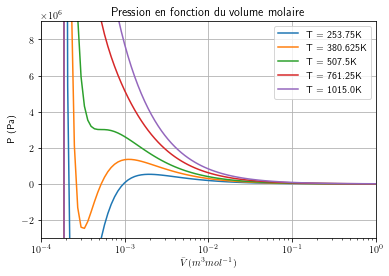

In [47]:
vec_V = np.logspace(-4,0,101,base=10) # Discrétisation du volume molaire entre 10^-4 et 10^
for t in T:
    P = fn_van_der_waals(const, t, vec_V) # Calcul de la pression avec notre fonction
    plt.semilogx(vec_V, P, label= f"T = {t}K")

plt.title("Pression en fonction du volume molaire")
plt.legend()
plt.xlabel(r'$\bar{V} (m^{3} mol^{-1})$')
plt.ylabel('P (Pa)')
plt.xlim(1e-4,1e0) # Fixe les limites en x
plt.ylim(-const.P_c,3*const.P_c) # Fixe les limites en y
plt.grid(True)

# Affichage du graphique
plt.show()

### 💡 Astuces


---

<center><h2 id='lexique'> Lexique </h2></center>

### 📚 Terminologie

### ✔️ Vu dans l'exemple 1

